# Framingham Heart study 
## Healthcare Data Science project
## Done by: Yuvraj Chibber
### Project aims to identify various similarities between Coronary heart disease patients and to  build a decision tree classifier that can predict the ten year risk of a patient developing CHD, given certain risk factors.

In [1]:
#importing libraries which will be required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Reading the csv file
ds=pd.read_csv('framingham.csv')

## Exploring Data

In [3]:
ds.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
#Count of CHD Patients from the survey [1 - If true]
ds['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

In [5]:
#Count of smokers [1 - If true]
ds['currentSmoker'].value_counts()

0    2145
1    2095
Name: currentSmoker, dtype: int64

In [6]:
# Count of diabetes patients [1 - If true]
ds['diabetes'].value_counts()

0    4131
1     109
Name: diabetes, dtype: int64

In [7]:
ds['male'].value_counts()

0    2420
1    1820
Name: male, dtype: int64

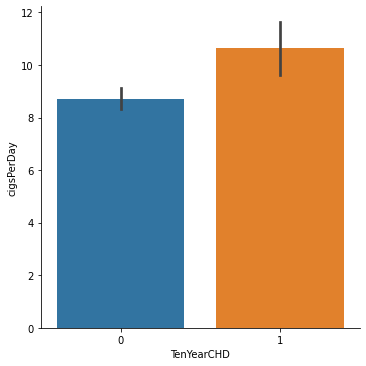

In [8]:
sns.catplot(x='TenYearCHD',y='cigsPerDay',kind='bar',data=ds)

Barplot between TenYearCHD and cigsPerDay shows Patients having CHD smoke more cigarattes per day

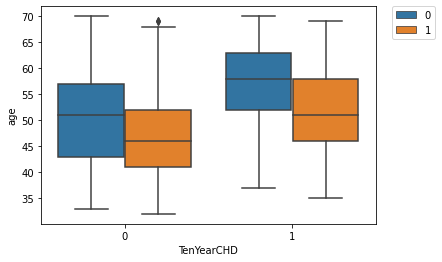

In [9]:
sns.boxplot(x=ds['TenYearCHD'],y=ds['age'],hue=ds['currentSmoker'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

From here, it can be seen that older patients are more likely to develop CHD. Smokers seem to be at a larger risk of developing CHD at a younger age, as compared to non-smokers.

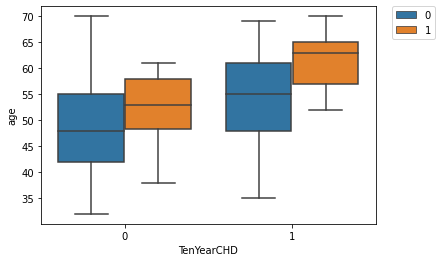

In [10]:
sns.boxplot(x=ds['TenYearCHD'],y=ds['age'],hue=ds['prevalentStroke'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

It looks as though strokes are more prevalent in participants of an older age group.

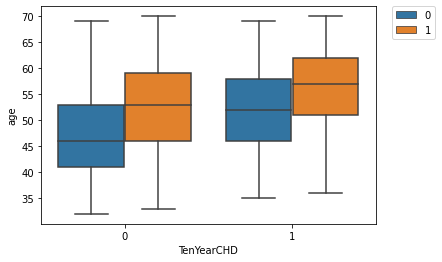

In [11]:
sns.boxplot(x=ds['TenYearCHD'],y=ds['age'],hue=ds['prevalentHyp'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

It looks as though hypertension are more prevalent in participants of an older age group.

(80.0, 725.45)

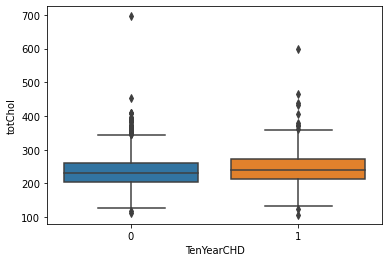

In [12]:
sns.boxplot(x=ds['TenYearCHD'],y=ds['totChol'])
plt.ylim(80)

Patients with a ten year CHD risk have slightly higher cholesterol levels than patients who don’t, though the difference is very small and not significant.

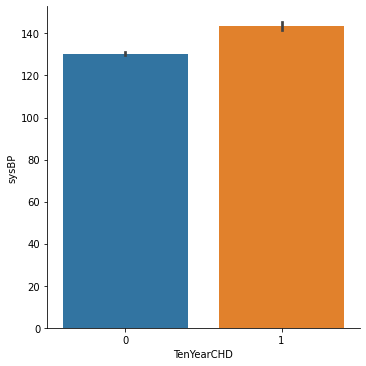

In [13]:
sns.catplot(x='TenYearCHD',y='sysBP',kind='bar',data=ds)

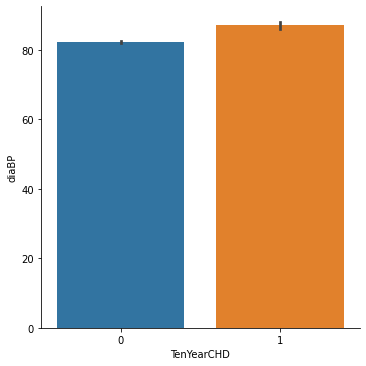

In [14]:
sns.catplot(x='TenYearCHD',y='diaBP',kind='bar',data=ds)

Blood pressure does seem to be linked with coronary heart disease. Patients with a ten year CHD risk seem to have higher blood pressure than the ones who don’t.

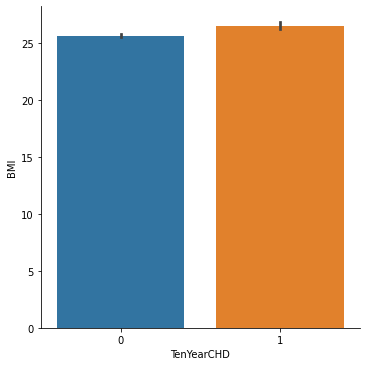

In [15]:
sns.catplot(x='TenYearCHD',y='BMI',kind='bar',data=ds)

Patients with CHD are seen to have slightly higher BMI than patients without.

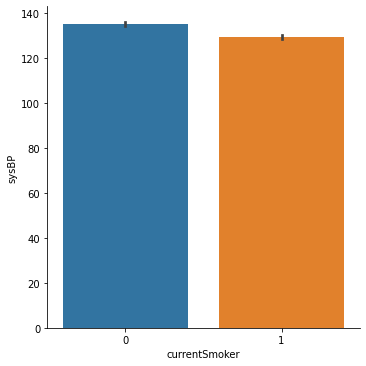

In [16]:
sns.catplot(x='currentSmoker',y='sysBP',kind='bar',data=ds)

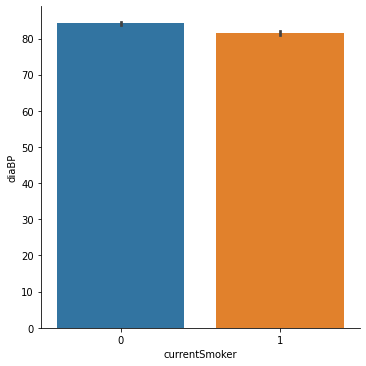

In [17]:
sns.catplot(x='currentSmoker',y='diaBP',kind='bar',data=ds)

People who smoked had low diaBP and sysBP in comparison to those who didn't

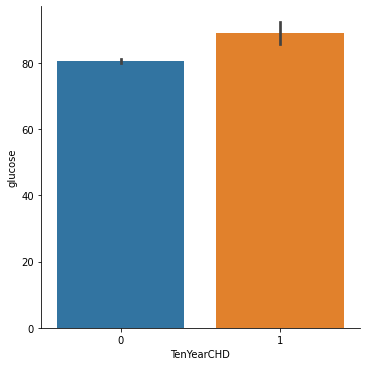

In [18]:
sns.catplot(x='TenYearCHD',y='glucose',kind='bar',data=ds)

People suffering fom CHD had higher glucose levels

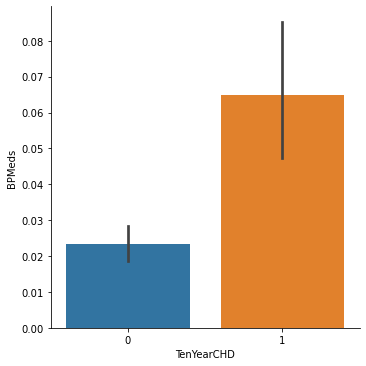

In [19]:
sns.catplot(x='TenYearCHD',y='BPMeds',kind='bar',data=ds)

A higher dosage of BP medications is associated with a larger ten year CHD risk.

## Data Preprocessing

In [20]:
#Checking for null values
ds.isnull().any()

male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

In [21]:
# Dropping column with Null values
ds=ds.dropna()

In [22]:
#Train-test split
from sklearn.model_selection import train_test_split
X=ds.drop('TenYearCHD',axis=1)
y=ds['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35)

In [28]:
# importing libraries which will be required.
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [30]:
#The data set is unbalanced, and more than 80% of the data is of participants who don’t have a ten year CHD risk.
To overcome this, I did both; oversampling and undersampling. Then, I created a pipeline for a decision tree classifier.
oversample = RandomOverSampler(sampling_strategy='minority')
X_over,y_over=oversample.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over,test_size=0.35)
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

In [31]:
#Fitting training data into model
pipeline.fit(X_train,y_train)

Pipeline(steps=[('under', RandomUnderSampler()),
                ('model', DecisionTreeClassifier())])

In [32]:
#Storing predictions of the model
pred=pipeline.predict(X_test)

In [33]:
#importing libraries to test the accuracy of model
from sklearn.metrics import classification_report,accuracy_score


In [34]:
#Classification report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.90      1106
           1       0.84      0.99      0.91      1065

    accuracy                           0.90      2171
   macro avg       0.91      0.90      0.90      2171
weighted avg       0.91      0.90      0.90      2171



In [35]:
#Accuracy score
print(accuracy_score(y_test,pred))

0.9023491478581299


The model has high precision and recall for both outcomes, and has an accuracy of 0.90, which beats the baseline.
And that’s it! We have successfully built a decision tree classifier to predict a patient’s 10 year risk of CHD.
